# Temps de réponse

On effectue le même algorithme sur ces données afin de déterminer les changements de vitesse. Même si dans ces données, les commandes en vitesse sont nettes et existantes, on applique la méthode géénrale, qui permettra de comparer les résultats.

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

In [2]:
RunNo = [5, 6, 9, 10, 12, 13]

In [4]:
#chargement des .csv
for i in RunNo:
    globals()["data{}".format(i)] = pd.read_csv('data/raw/data{}.csv'.format(i), sep = ',', decimal = '.', low_memory = False)

Au niveau des colonnes sélectionnées, on a pour chaque véhicule du peloton :
- CARMA_mode : identifie si le mode CARMA est activé ;
- Speed_command : vitesse commandée par le système au véhicule (consigne de vitesse) ;
- avg_speed_driven_wheels : vitesse des roues motrices ;
- GPS_CARMA_speed : vitesse mesurée par le système CARMA ;
- GPS_speed : vitesse mesurée par un autre système GPS ;
- acceleration : accélération du véhicule ;
- fuel_consumption : consommation en carburant ;
- radar1 : position des véhicules détectée 2 à 2 par le radar 1.

In [5]:
data5

,Date,Heure,Time,leader_CARMA_mode,leader_Speed_command,leader_CARMA_ovr,leader_avg_speed_driven_wheels,leader_ACC_speed,leader_ACC_status,leader_GPS_CARMA_speed,...,follower4_ACC_speed,follower4_ACC_status,follower4_GPS_CARMA_speed,follower4_GPS_speed,follower4_acceleration,follower4_fuel_consumption,follower4_CARMA_ovr_manual,follower4_radar1,follower4_radar7,follower4_radar9
0,17/07/2018,13:44:00,0.0,NaN,NaN,NaN,3.224829,20.989585,0.0,NaN,...,21.440974,0.0,15.087,NaN,0.00,4.700,NaN,70.375,101.625,0.000
1,17/07/2018,13:44:00,0.1,NaN,NaN,NaN,3.012155,20.989585,0.0,NaN,...,21.440974,0.0,15.043,NaN,0.00,4.175,NaN,70.375,101.625,0.000
2,17/07/2018,13:44:00,0.2,NaN,NaN,NaN,2.847224,20.989585,0.0,NaN,...,21.440974,0.0,15.002,NaN,0.00,3.800,NaN,70.375,101.500,0.000
3,17/07/2018,13:44:00,0.3,NaN,NaN,NaN,2.625870,20.989585,0.0,NaN,...,21.440974,0.0,14.962,NaN,-0.09,3.450,NaN,70.500,101.375,0.000
4,17/07/2018,13:44:00,0.4,NaN,NaN,NaN,2.469620,20.989585,0.0,NaN,...,21.440974,0.0,14.934,NaN,-0.09,3.200,NaN,70.500,101.125,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,17/07/2018,13:50:39,399.5,2.0,26.822938,1.0,26.918424,4.479167,1.0,26.842,...,4.479167,1.0,26.736,NaN,0.00,7.875,NaN,27.625,0.000,93.375
3996,17/07/2018,13:50:39,399.6,2.0,26.822938,1.0,26.918424,4.479167,1.0,26.848,...,4.479167,1.0,26.738,NaN,0.00,6.650,NaN,27.625,0.000,126.625
3997,17/07/2018,13:50:39,399.7,2.0,26.822938,1.0,26.918424,4.479167,1.0,26.840,...,4.479167,1.0,26.749,NaN,0.00,7.575,NaN,27.625,0.000,126.625
3998,17/07/2018,13:50:39,399.8,2.0,26.822938,1.0,26.927105,4.479167,1.0,26.842,...,4.479167,1.0,26.746,NaN,0.00,7.775,NaN,27.625,0.000,93.375


In [6]:
#création d'une colonne pour avoir la distance au leader pour chacun des véhicules
for i in RunNo:
    globals()['data{}'.format(i)]['distToLeader_f1'] = globals()['data{}'.format(i)].follower1_radar1 
    globals()['data{}'.format(i)]['distToLeader_f2'] = globals()['data{}'.format(i)].follower1_radar1 + globals()['data{}'.format(i)].follower2_radar1     
    globals()['data{}'.format(i)]['distToLeader_f3'] = globals()['data{}'.format(i)].follower1_radar1 + globals()['data{}'.format(i)].follower2_radar1 + globals()['data{}'.format(i)].follower3_radar1 
    globals()['data{}'.format(i)]['distToLeader_f4'] = globals()['data{}'.format(i)].follower1_radar1 + globals()['data{}'.format(i)].follower2_radar1 + globals()['data{}'.format(i)].follower3_radar1 + globals()['data{}'.format(i)].follower4_radar1 

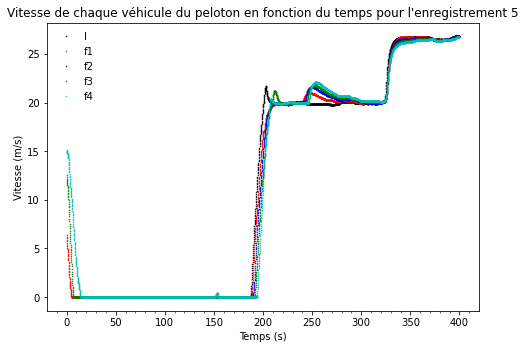

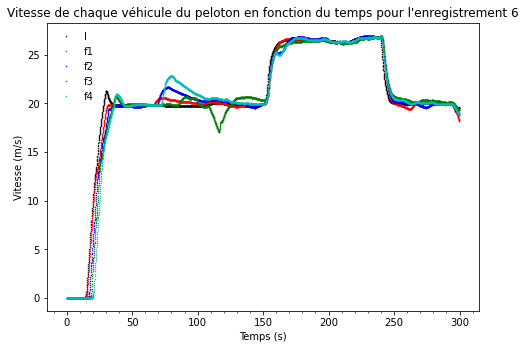

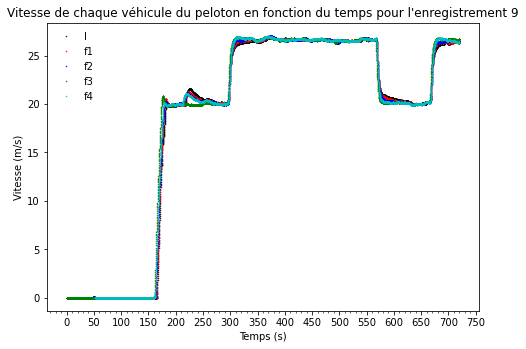

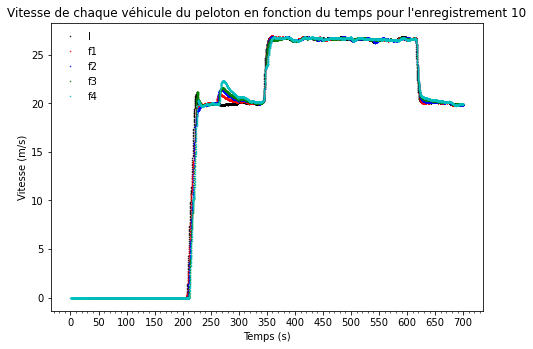

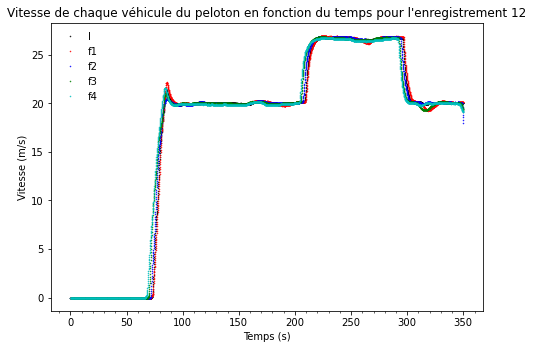

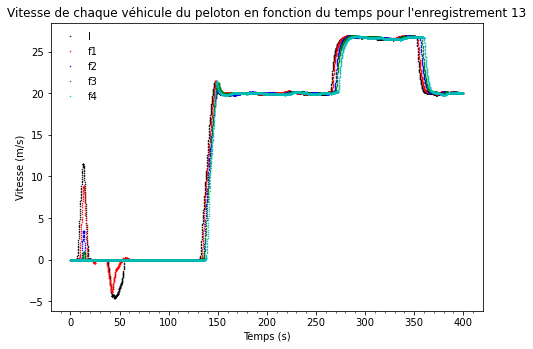

In [7]:
#avec la vitesse du système CARMA
c = ['ok', 'or', 'ob', 'og', 'oc']
for i in RunNo:
    test = globals()["data{}".format(i)]
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    for j in range(5):
        if j == 0:
            ax.plot(test.Time, test['leader_GPS_CARMA_speed'], c[j], markersize=0.5, label='l')
        else:
            ax.plot(test.Time, test['follower{}_GPS_CARMA_speed'.format(j)], c[j], markersize=0.5, label='f{}'.format(j))
    ax.set_xlabel("Temps (s)")
    ax.xaxis.set_major_locator(MultipleLocator(50))
    ax.xaxis.set_minor_locator(MultipleLocator(10))
    ax.set_ylabel("Vitesse (m/s)")
    ax.set_title("Vitesse de chaque véhicule du peloton en fonction du temps pour l'enregistrement " + str(i))
    ax.legend(loc='best', frameon=False)
plt.show()
    

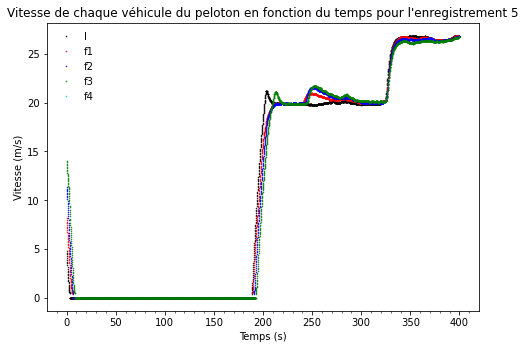

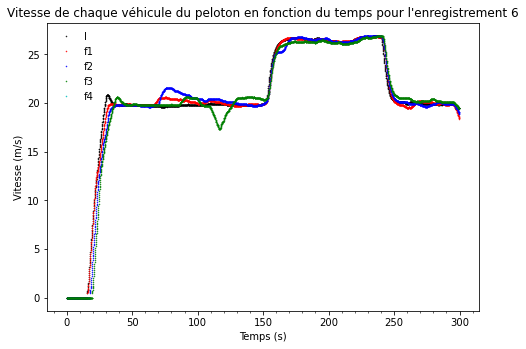

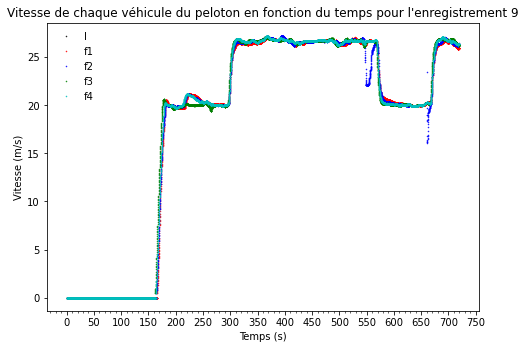

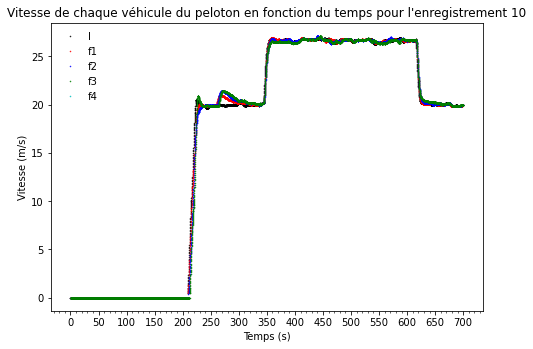

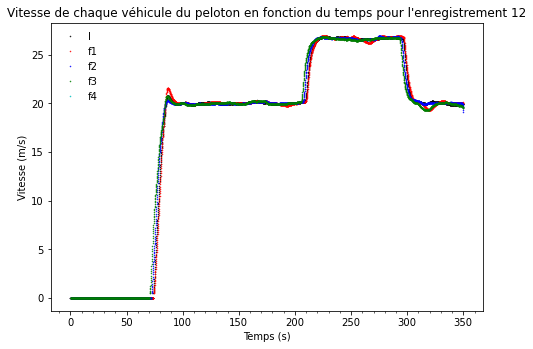

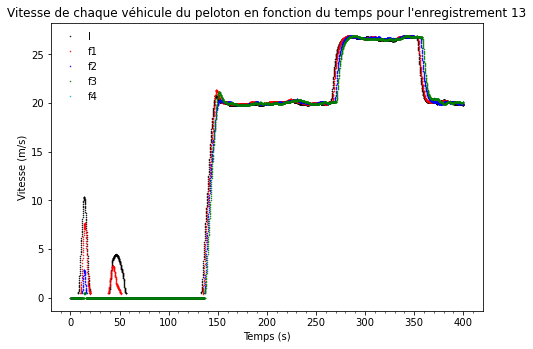

In [8]:
#avec la vitesse d'un autre système GPS
c = ['ok', 'or', 'ob', 'og', 'oc']
for i in RunNo:
    test = globals()["data{}".format(i)]
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    for j in range(5):
        if j == 0:
            ax.plot(test.Time, test['leader_GPS_speed'], c[j], markersize=0.5, label='l')
        else:
            ax.plot(test.Time, test['follower{}_GPS_speed'.format(j)], c[j], markersize=0.5, label='f{}'.format(j))
    ax.set_xlabel("Temps (s)")
    ax.xaxis.set_major_locator(MultipleLocator(50))
    ax.xaxis.set_minor_locator(MultipleLocator(10))
    ax.set_ylabel("Vitesse (m/s)")
    ax.set_title("Vitesse de chaque véhicule du peloton en fonction du temps pour l'enregistrement " + str(i))
    ax.legend(loc='best', frameon=False)
plt.show()
    

On prend la vitesse CARMA qui est définie pour tous les véhicules.

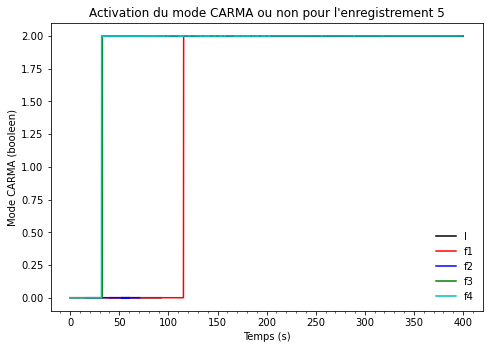

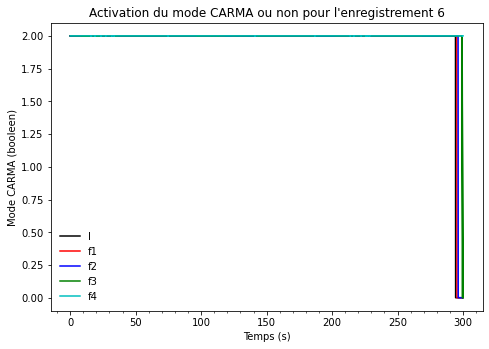

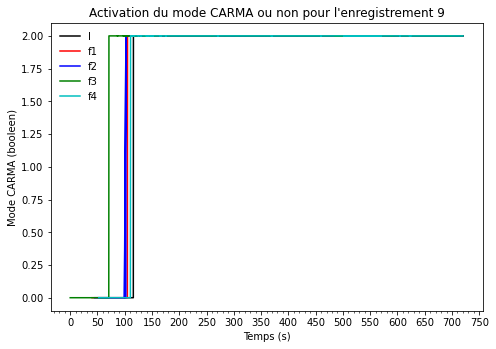

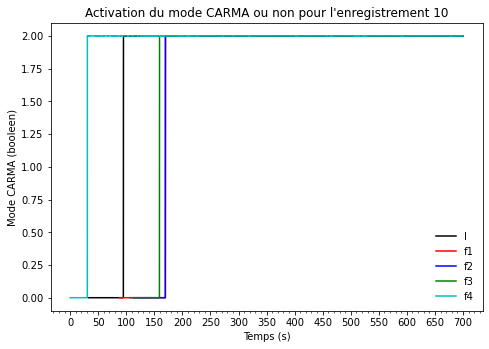

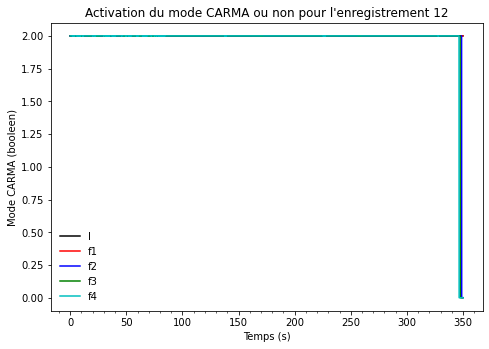

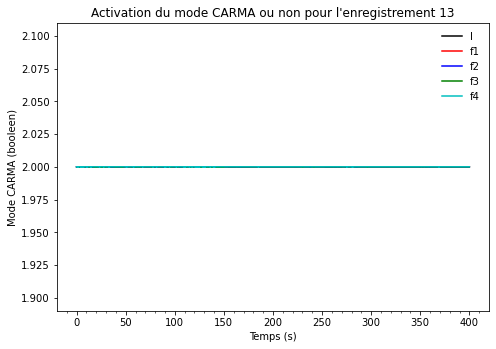

In [9]:
#activiation du mode CARMA
c = ['-k', '-r', '-b', '-g', '-c']
for i in RunNo:
    test = globals()["data{}".format(i)]
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    for j in range(5):
        if j == 0:
            ax.plot(test.Time, test['leader_CARMA_mode'], c[j], markersize=0.5, label='l')
        else:
            ax.plot(test.Time, test['follower{}_CARMA_mode'.format(j)], c[j], markersize=0.5, label='f{}'.format(j))
    ax.set_xlabel("Temps (s)")
    ax.xaxis.set_major_locator(MultipleLocator(50))
    ax.xaxis.set_minor_locator(MultipleLocator(10))
    ax.set_ylabel("Mode CARMA (booleen)")
    ax.set_title("Activation du mode CARMA ou non pour l'enregistrement " + str(i))
    ax.legend(loc='best', frameon=False)
plt.show()
    

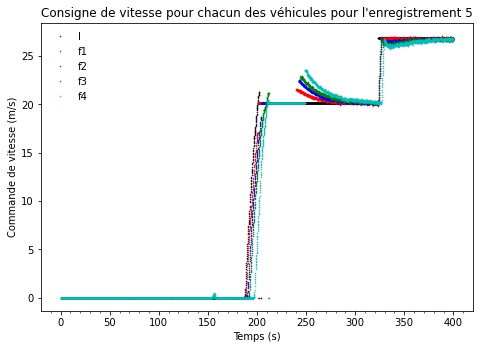

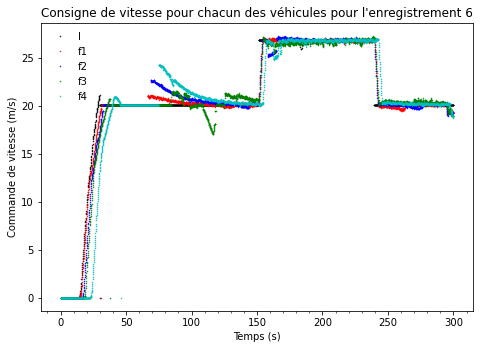

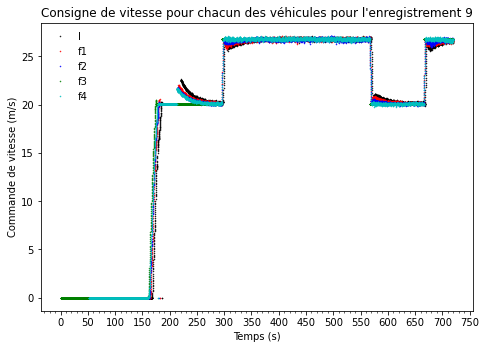

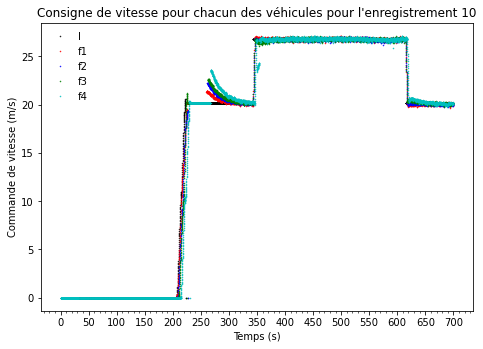

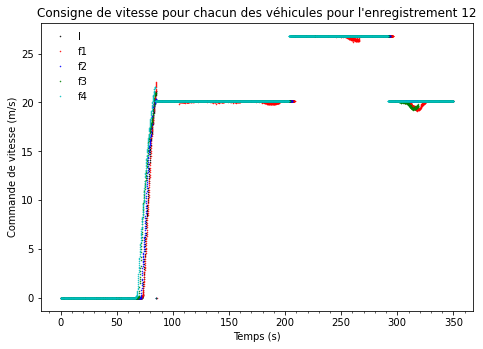

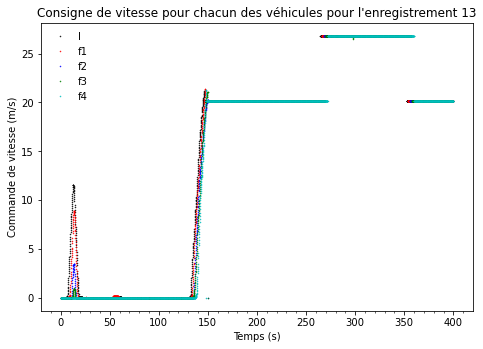

In [10]:
#command de vitesse des véhicules
c = ['ok', 'or', 'ob', 'og', 'oc']
for i in RunNo:
    test = globals()["data{}".format(i)]
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    for j in range(5):
        if j == 0:
            ax.plot(test.Time, test['leader_Speed_command'], c[j], markersize=0.5, label='l')
        else:
            ax.plot(test.Time, test['follower{}_Speed_command'.format(j)], c[j], markersize=0.5, label='f{}'.format(j))
    ax.set_xlabel("Temps (s)")
    ax.xaxis.set_major_locator(MultipleLocator(50))
    ax.xaxis.set_minor_locator(MultipleLocator(10))
    ax.set_ylabel("Commande de vitesse (m/s)")
    ax.set_title("Consigne de vitesse pour chacun des véhicules pour l'enregistrement " + str(i))
    ax.legend(loc='best', frameon=False)
plt.show()
    

## Temps de réponse des véhicules face à un changement de vitesse

On avait pensé raisonner avec la consigne de vitesse de chacun des véhicules et ainsi prendre en compte le temps de réponse du véhicule par rapport à sa consigne. Cependant, cette méthode ne marche pas lorsque les profis de consigne ont des données manquantes trop importantes. On décide donc de tenter de connaître les changements de vitesse de chacun des véhicules (du leader tout d'abord).

In [11]:
#suppression des valeurs manquantes
for i in RunNo:
    for j in range(5):
        if j ==0:
            globals()['data{}'.format(i)] = globals()['data{}'.format(i)][globals()['data{}'.format(i)].leader_GPS_CARMA_speed.isna() == False]
        else:
            globals()['data{}'.format(i)] = globals()['data{}'.format(i)][globals()['data{}'.format(i)]['follower{}_GPS_CARMA_speed'.format(j)].isna() == False]


In [12]:
for i in RunNo:
    globals()["data{}".format(i)] = globals()["data{}".format(i)].reset_index(drop = True)

In [13]:
#tri des valeurs par 'Time'
for i in RunNo:
    globals()['data{}'.format(i)] = globals()['data{}'.format(i)].sort_values(by = 'Time')

In [14]:
#on reprend les index
for i in RunNo:
    globals()['data{}'.format(i)] = globals()['data{}'.format(i)].reset_index(drop = True)

In [15]:
data5

,Date,Heure,Time,leader_CARMA_mode,leader_Speed_command,leader_CARMA_ovr,leader_avg_speed_driven_wheels,leader_ACC_speed,leader_ACC_status,leader_GPS_CARMA_speed,...,follower4_acceleration,follower4_fuel_consumption,follower4_CARMA_ovr_manual,follower4_radar1,follower4_radar7,follower4_radar9,distToLeader_f1,distToLeader_f2,distToLeader_f3,distToLeader_f4
0,17/07/2018,13:44:40,40.4,0.0,0.000000,0.0,0.000000,20.989585,0.0,0.001,...,0.0,1.700,NaN,9.000,0.0,0.000,5.500,10.750,14.250,23.250
1,17/07/2018,13:44:40,40.5,0.0,0.000000,0.0,0.000000,20.989585,0.0,0.000,...,0.0,1.700,NaN,9.000,0.0,0.000,5.500,10.625,14.125,23.125
2,17/07/2018,13:44:40,40.6,0.0,0.000000,0.0,0.000000,20.989585,0.0,0.000,...,0.0,2.250,NaN,9.000,0.0,0.000,5.500,10.750,14.250,23.250
3,17/07/2018,13:44:40,40.7,0.0,0.000000,0.0,0.000000,20.989585,0.0,0.001,...,0.0,1.650,NaN,9.000,0.0,0.000,5.500,10.750,14.250,23.250
4,17/07/2018,13:44:40,40.8,0.0,0.000000,0.0,0.000000,20.989585,0.0,0.000,...,0.0,1.625,NaN,8.875,0.0,0.000,5.500,10.750,14.250,23.125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3591,17/07/2018,13:50:39,399.5,2.0,26.822938,1.0,26.918424,4.479167,1.0,26.842,...,0.0,7.875,NaN,27.625,0.0,93.375,29.375,57.625,86.500,114.125
3592,17/07/2018,13:50:39,399.6,2.0,26.822938,1.0,26.918424,4.479167,1.0,26.848,...,0.0,6.650,NaN,27.625,0.0,126.625,29.375,57.625,86.375,114.000
3593,17/07/2018,13:50:39,399.7,2.0,26.822938,1.0,26.918424,4.479167,1.0,26.840,...,0.0,7.575,NaN,27.625,0.0,126.625,29.375,57.625,86.375,114.000
3594,17/07/2018,13:50:39,399.8,2.0,26.822938,1.0,26.927105,4.479167,1.0,26.842,...,0.0,7.775,NaN,27.625,0.0,93.375,29.375,57.625,86.375,114.000


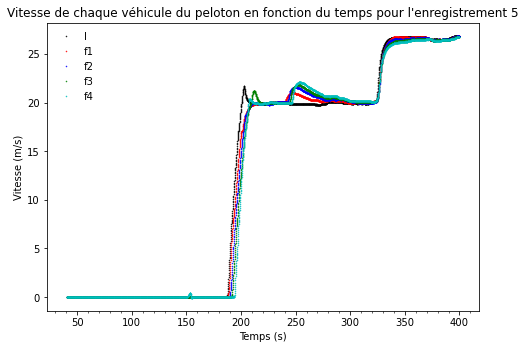

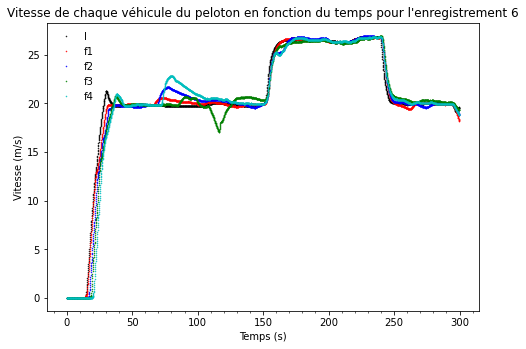

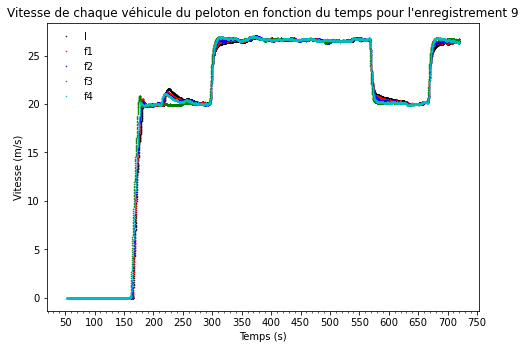

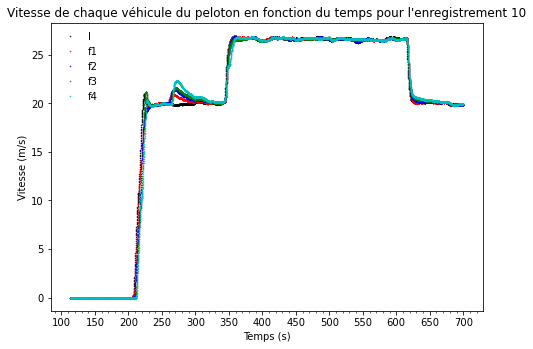

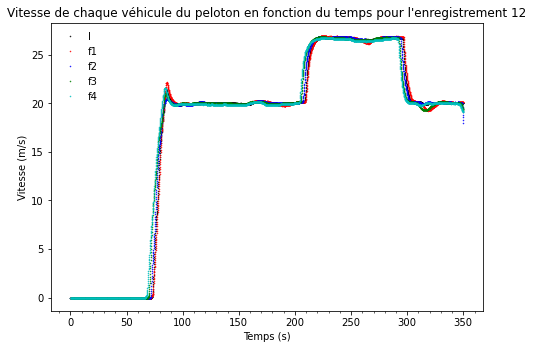

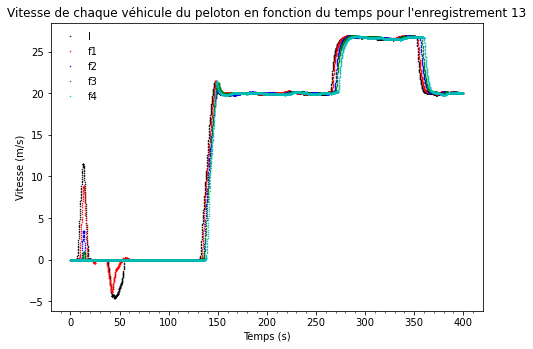

In [16]:
#avec la vitesse du système CARMA
c = ['ok', 'or', 'ob', 'og', 'oc']
for i in RunNo:
    test = globals()["data{}".format(i)]
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    for j in range(5):
        if j == 0:
            ax.plot(test.Time, test['leader_GPS_CARMA_speed'], c[j], markersize=0.5, label='l')
        else:
            ax.plot(test.Time, test['follower{}_GPS_CARMA_speed'.format(j)], c[j], markersize=0.5, label='f{}'.format(j))
    ax.set_xlabel("Temps (s)")
    ax.xaxis.set_major_locator(MultipleLocator(50))
    ax.xaxis.set_minor_locator(MultipleLocator(10))
    ax.set_ylabel("Vitesse (m/s)")
    ax.set_title("Vitesse de chaque véhicule du peloton en fonction du temps pour l'enregistrement " + str(i))
    ax.legend(loc='best', frameon=False)
plt.show()
    

On doit non seulement prendre en compte les changements de vitesse mais aussi ne prendre en comtpe que les changements réels et non le bruit qui peut apparaître sur les données.

In [17]:
#création du df pour l'analyse statistique
stat_kernel = pd.DataFrame()
stat_kernel['id'] = []
stat_kernel['veh_position'] = []
stat_kernel['reaction_time'] = []
stat_kernel['time'] = []
stat_kernel['veh_mode'] = []

In [18]:
#on choisit h = 1s, avec une fréquence de 10 Hz, ça représente 10 valeurs par seconde
#on choisit une fréquence f de 0.1s, ce qui revient à prendre tous les pas
h = 10

### Traitement des leader

In [19]:
#on définit les variables moyenne et écart type
for i in RunNo:
    globals()['mu{}_leader'.format(i)] = []
    globals()['sigma{}_leader'.format(i)] = []
    for k in range(len(globals()["data{}".format(i)].Time) - h):
        #on calcule la moyenne des vitesses sur la plage [i - 10 ; i + 10]
        globals()['mu{}_leader'.format(i)].append(np.mean([globals()["data{}".format(i)].leader_GPS_CARMA_speed[j] for j in range(k, k + h)]))

In [20]:
#on définit sigma pour tout élément de mu comme l'écart type des valeurs de vitesse moyennées sur la tranche de largeur h
for i in RunNo:
    for k in range(len(globals()["mu{}_leader".format(i)]) - h):
        globals()['sigma{}_leader'.format(i)].append(np.std([globals()["mu{}_leader".format(i)][j] for j in range(k, k + h)]))
        

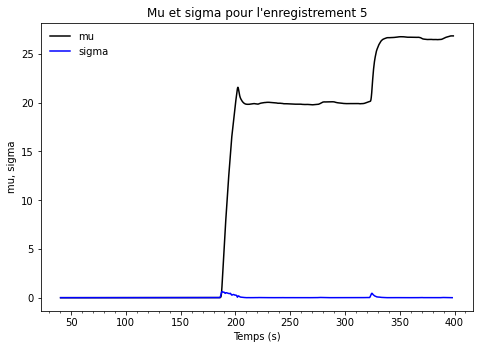

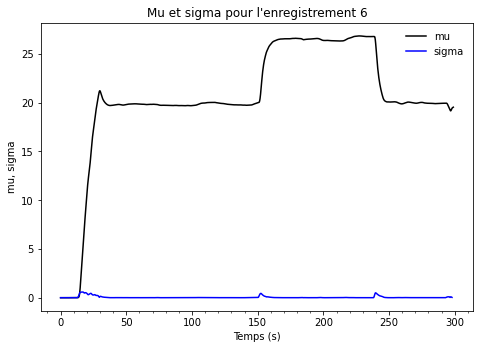

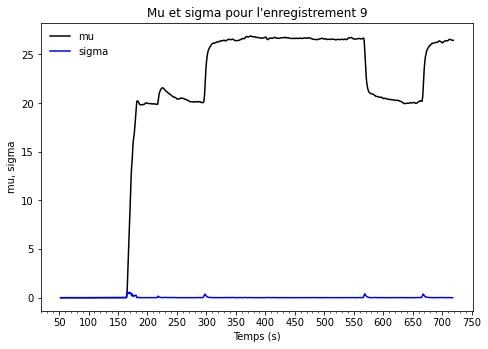

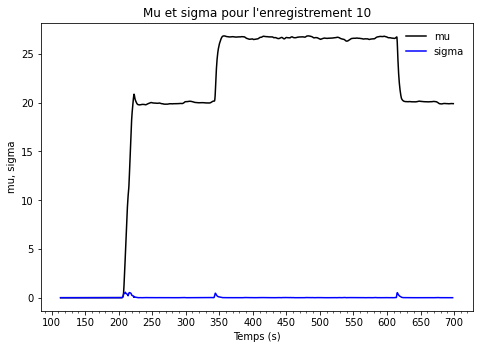

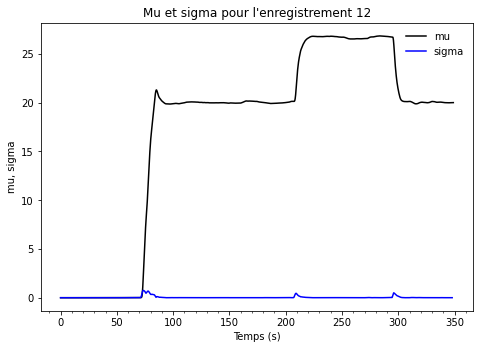

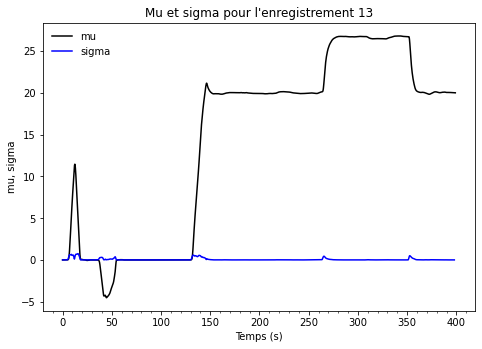

In [21]:
for i in RunNo:
    #print(i)
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    #ax.plot(data5.Time[:-10], data5.leader_GPS_CARMA_speed[:-10], 'ok', markersize = 0.5, label = 'speed')
    ax.plot(globals()['data{}'.format(i)].Time[:-h], np.array(globals()['mu{}_leader'.format(i)]), '-k', markersize = 0.5, label = 'mu') 
    ax.plot(globals()['data{}'.format(i)].Time[:-2*h], np.array(globals()['sigma{}_leader'.format(i)]), 'b', markersize = 0.5, label = 'sigma')
    #ax.plot((globals()['data{}'.format(i)]['elapsed_time (s)'][3250], globals()['data{}'.format(i)]['elapsed_time (s)'][3250]), (0, 30))
    #ax.plot((globals()['data{}'.format(i)]['elapsed_time (s)'][3470], globals()['data{}'.format(i)]['elapsed_time (s)'][3470]), (0, 30))
    ax.set_xlabel("Temps (s)")
    ax.xaxis.set_major_locator(MultipleLocator(50))
    ax.xaxis.set_minor_locator(MultipleLocator(10))
    ax.set_ylabel("mu, sigma")
    ax.set_title("Mu et sigma pour l'enregistrement " + str(i))
    ax.legend(loc='best', frameon=False)
plt.show()

In [22]:
#réglage du problème de vitesse négative
#on règle ce probème pour tous les véhicules du peloton d'un coup
for i in RunNo:
    for f in range(5):
        if f == 0:
            for j in range(len(globals()['data{}'.format(i)].Time)):
                if globals()['data{}'.format(i)].leader_GPS_CARMA_speed[j] < 0:
                    globals()['data{}'.format(i)].leader_GPS_CARMA_speed[j] = 0 
        else:
            for j in range(len(globals()['data{}'.format(i)].Time)):
                if globals()['data{}'.format(i)]['follower{}_GPS_CARMA_speed'.format(f)][j] < 0:
                    globals()['data{}'.format(i)]['follower{}_GPS_CARMA_speed'.format(f)][j] = 0 

/Users/ladino/opt/anaconda3/envs/cacc/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/ladino/opt/anaconda3/envs/cacc/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [23]:
for i in RunNo:
    globals()['dsigma_tot{}_leader'.format(i)] = []
    globals()['dsigma_tot{}_leader'.format(i)] = np.std([globals()['sigma{}_leader'.format(i)][j] - globals()['sigma{}_leader'.format(i)][j - 1] for j in range(1, len(globals()['data{}'.format(i)].Time[:-2*h]))])

Dans ces données, un unique mode est utilisé : il s'agit du CACC avec le système CARMA, ce qui est intéressant car cela nous donne un nombre de données à comparer plus important. L'avantage est qu'il n'y a pas plusieurs cas à traiter.

In [24]:
#on doit maintenant faire apparaître les changements de vitesse (stabilité puis évolution)
#on fixe dt à 1s (dt ne doit pas être trop grand mais assez grand pour avoir le temps d'être une vraie accélération ou décélération)
dt = 20*1
#on doit détecter une période de stabilité avant le changement de vitesse
#DT doit être assez grande (20s)
DT = 20*20

In [25]:
#a est utilisé comme facteur pour la période de stabilité (valeur assez grande pour omettre les oscillations d'adaptation)
a = 0.75
#b est utilisé pour les variations pour les périodes d'évolution de vitesse
#la valeur peut être plus faible que celle de a étant donné que les instants choisis doivent donner des modifications de vitesse assez importantes pendant dt
b = 0.8
#c est utilisé pour qualifier la proportion de valeurs dans l'intervalle [j, j + dt] sont requises
d = 0.8

In [28]:
#remplissage des listes 'changement de vitesse'
for i in RunNo:
    print(i)
    globals()['chgt_vitesse{}_leader'.format(i)] = []
    globals()['vitesse{}_leader'.format(i)] = []
    inc_prov = -1
    #on commence à DT et on finit à dt
    for j in range(DT + 1, len(globals()['data{}'.format(i)].Time[:-2*h]) - dt):
        #on veut savoir si une évolution est possible
        #on doit tout d'abord observer une période stabilité pendant DT
        #on regarde la stabilité sur sigma et non sur mu
        if (max([abs(globals()['sigma{}_leader'.format(i)][k] - globals()['sigma{}_leader'.format(i)][k - 1]) for k in range(j - DT, j)]) < a*globals()['dsigma_tot{}_leader'.format(i)]):
            inc = 0
            #print(j, globals()['data{}'.format(i)]['elapsed_time (s)'][j])
            #on veut prendre en compte non pas le minimum qui est trop restrictif, mais on cherche à avoir 90% des valeurs de l'intervalle de largeur dt qui conviennent
            for k in range(j, j + dt):
                if abs(globals()['sigma{}_leader'.format(i)][k + 1] - globals()['sigma{}_leader'.format(i)][k]) > b*globals()['dsigma_tot{}_leader'.format(i)]:
                    inc += 1
            print(j,inc)
            if inc > d*dt:
                if inc_prov == -1:
                    globals()['chgt_vitesse{}_leader'.format(i)].append(globals()['data{}'.format(i)].Time[j])
                    globals()['vitesse{}_leader'.format(i)].append(globals()['data{}'.format(i)].leader_GPS_CARMA_speed[j])
                    inc_prov += 1
                else:
                    #on supprime les changements de vitesse en fin d'enregistrements afin d'éviter de ne pas les retrouver pour les derniers suiveurs
                    if (globals()['data{}'.format(i)].Time[j] > globals()['chgt_vitesse{}_leader'.format(i)][inc_prov] + dt) and (globals()['data{}'.format(i)].Time[j] < (globals()['data{}'.format(i)].Time.iloc[-1] - 15)):
                        globals()['chgt_vitesse{}_leader'.format(i)].append(globals()['data{}'.format(i)].Time[j])
                        globals()['vitesse{}_leader'.format(i)].append(globals()['data{}'.format(i)].leader_GPS_CARMA_speed[j])
                        inc_prov += 1

5
401 0
402 0
403 0
404 0
405 0
406 0
407 0
408 0
409 0
410 0
411 0
412 0
413 0
414 0
415 0
416 0
417 0
418 0
419 0
420 0
421 0
422 0
423 0
424 0
425 0
426 0
427 0
428 0
429 0
430 0
431 0
432 0
433 0
434 0
435 0
436 0
437 0
438 0
439 0
440 0
441 0
442 0
443 0
444 0
445 0
446 0
447 0
448 0
449 0
450 0
451 0
452 0
453 0
454 0
455 0
456 0
457 0
458 0
459 0
460 0
461 0
462 0
463 0
464 0
465 0
466 0
467 0
468 0
469 0
470 0
471 0
472 0
473 0
474 0
475 0
476 0
477 0
478 0
479 0
480 0
481 0
482 0
483 0
484 0
485 0
486 0
487 0
488 0
489 0
490 0
491 0
492 0
493 0
494 0
495 0
496 0
497 0
498 0
499 0
500 0
501 0
502 0
503 0
504 0
505 0
506 0
507 0
508 0
509 0
510 0
511 0
512 0
513 0
514 0
515 0
516 0
517 0
518 0
519 0
520 0
521 0
522 0
523 0
524 0
525 0
526 0
527 0
528 0
529 0
530 0
531 0
532 0
533 0
534 0
535 0
536 0
537 0
538 0
539 0
540 0
541 0
542 0
543 0
544 0
545 0
546 0
547 0
548 0
549 0
550 0
551 0
552 0
553 0
554 0
555 0
556 0
557 0
558 0
559 0
560 0
561 0
562 0
563 0
564 0
565 0
566 0
56

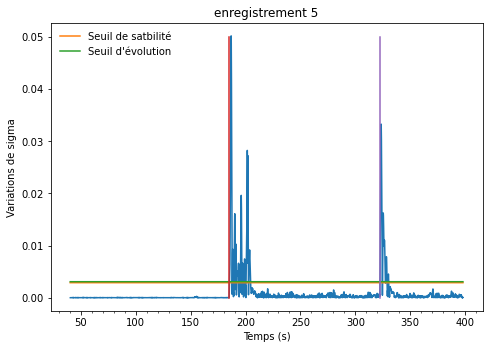

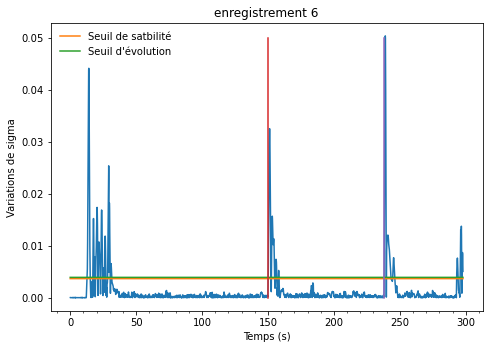

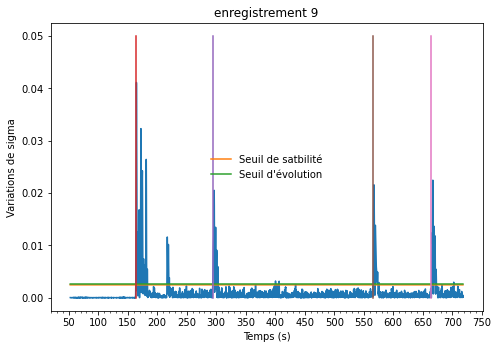

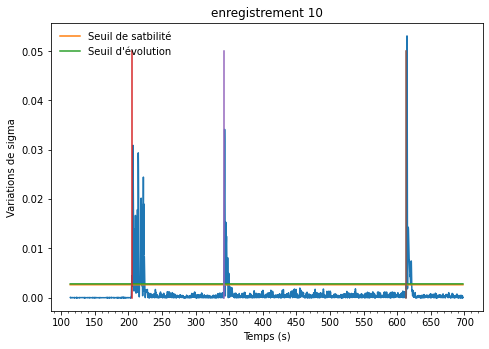

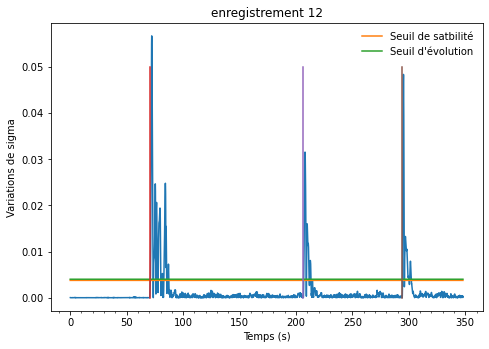

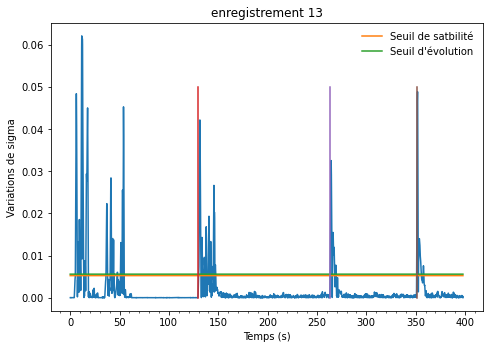

In [27]:
for i in RunNo:
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.plot(globals()['data{}'.format(i)].Time[1:-2*h], [abs(globals()['sigma{}_leader'.format(i)][k] - globals()['sigma{}_leader'.format(i)][k - 1]) for k in range(1, len(globals()['data{}'.format(i)].Time[:-2*h]))])
    ax.plot(globals()['data{}'.format(i)].Time[:-2*h], [a*np.std([globals()['sigma{}_leader'.format(i)][j] - globals()['sigma{}_leader'.format(i)][j - 1] for j in range(1, len(globals()['data{}'.format(i)].Time[:-2*h]))])]*len(globals()['data{}'.format(i)].Time[:-2*h]), label = "Seuil de satbilité")    
    ax.plot(globals()['data{}'.format(i)].Time[:-2*h], [b*np.std([globals()['sigma{}_leader'.format(i)][j] - globals()['sigma{}_leader'.format(i)][j - 1] for j in range(1, len(globals()['data{}'.format(i)].Time[:-2*h]))])]*len(globals()['data{}'.format(i)].Time[:-2*h]), label = "Seuil d'évolution")

    for j in range(len(globals()['chgt_vitesse{}_leader'.format(i)])):
        ax.plot((globals()['chgt_vitesse{}_leader'.format(i)][j], globals()['chgt_vitesse{}_leader'.format(i)][j]), (0, 0.05))
    ax.xaxis.set_major_locator(MultipleLocator(50))
    ax.xaxis.set_minor_locator(MultipleLocator(10))
    ax.set_xlabel("Temps (s)")
    ax.set_ylabel("Variations de sigma")
    ax.set_title('enregistrement {}'.format(i))
    ax.legend(loc='best', frameon=False)
plt.show()

In [293]:
for i in RunNo:
    print(i, len(globals()['chgt_vitesse{}_leader'.format(i)]), globals()['chgt_vitesse{}_leader'.format(i)])

5 2 [185.1, 322.0]
6 2 [149.9, 237.9]
9 4 [163.2, 293.8, 565.7000000000003, 664.7000000000003]
10 3 [204.7, 341.6, 613.7000000000003]
12 3 [70.7, 206.5, 294.2]
13 3 [129.8, 263.0, 350.8]


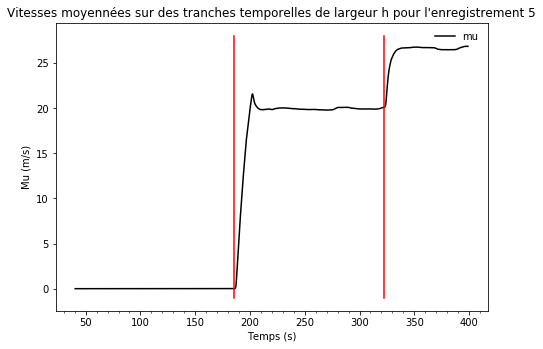

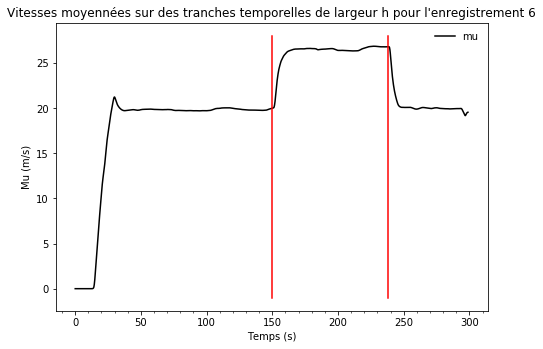

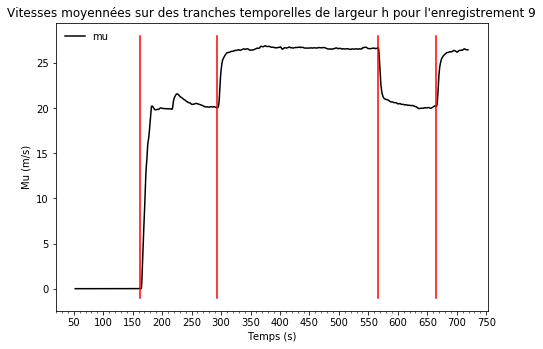

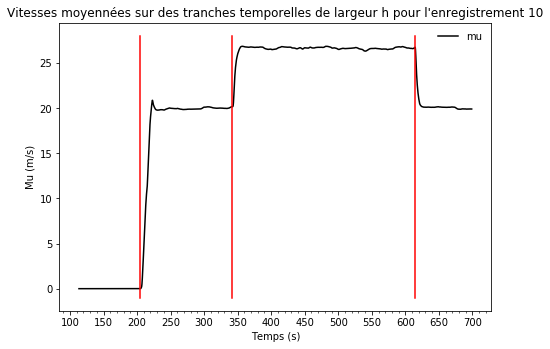

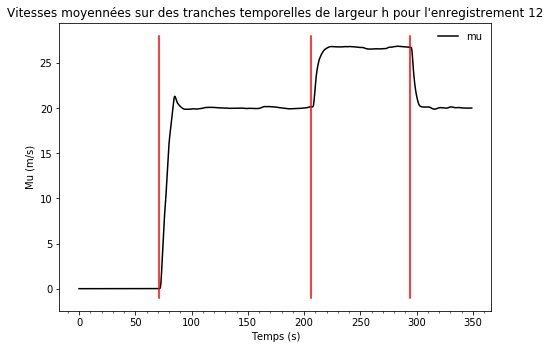

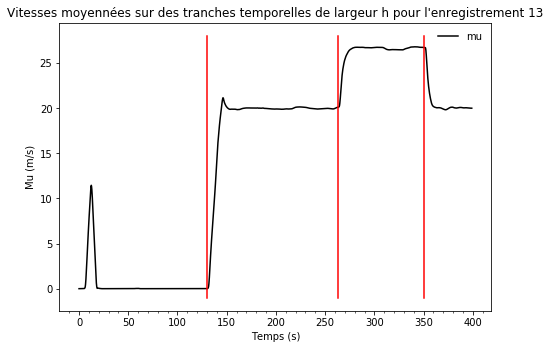

In [294]:
#représentation des instants des changements de vitesse sur le profil de vitesse des enregistrements en CACC
#première manière de contrôler l'agorithme
for i in RunNo:
    #print(i)
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.plot(globals()['data{}'.format(i)].Time[:-h], np.array(globals()['mu{}_leader'.format(i)]), '-k', markersize = 0.3, label = 'mu') 
    for j in range(len(globals()['chgt_vitesse{}_leader'.format(i)])):
        ax.plot((globals()['chgt_vitesse{}_leader'.format(i)][j], globals()['chgt_vitesse{}_leader'.format(i)][j]), (-1, 28), '-r', markersize = 0.3)
    
    ax.set_xlabel("Temps (s)")
    ax.xaxis.set_major_locator(MultipleLocator(50))
    ax.xaxis.set_minor_locator(MultipleLocator(10))
    ax.set_ylabel("Mu (m/s)")
    ax.set_title("Vitesses moyennées sur des tranches temporelles de largeur h pour l'enregistrement " + str(i))
    ax.legend(loc='best', frameon=False)
plt.show()

### Traitement pour les suiveurs

In [20]:
#on définit les variables moyenne et écart type
for i in RunNo:
    for j in range(1, 5):
        globals()['mu{}_follower{}'.format(i, j)] = []
        globals()['sigma{}_follower{}'.format(i, j)] = []
        for k in range(len(globals()["data{}".format(i)].Time) - h):
            #on calcule la moyenne des vitesses sur la plage [i - 10 ; i + 10]
            globals()['mu{}_follower{}'.format(i, j)].append(np.mean([globals()["data{}".format(i)]['follower{}_GPS_CARMA_speed'.format(j)][l] for l in range(k, k + h)]))

In [21]:
#on définit sigma pour tout élément de mu comme l'écart type des valeurs de vitesse moyennées sur la tranche de largeur h
for i in RunNo:
    for j in range(1, 5):
        for k in range(len(globals()["mu{}_follower{}".format(i, j)]) - h):
            globals()['sigma{}_follower{}'.format(i, j)].append(np.std([globals()["mu{}_follower{}".format(i, j)][l] for l in range(k, k + h)]))
        

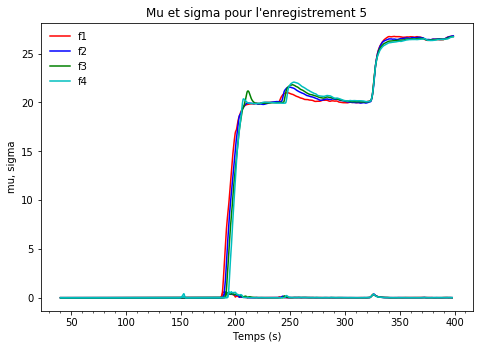

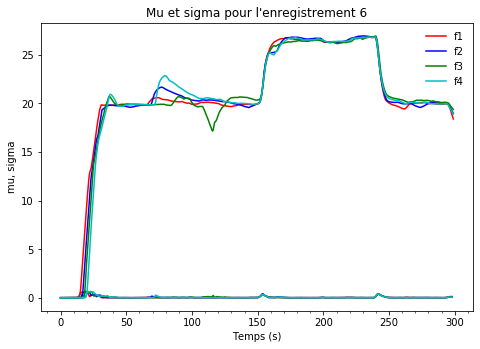

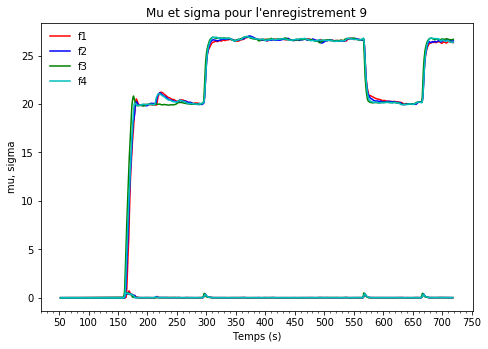

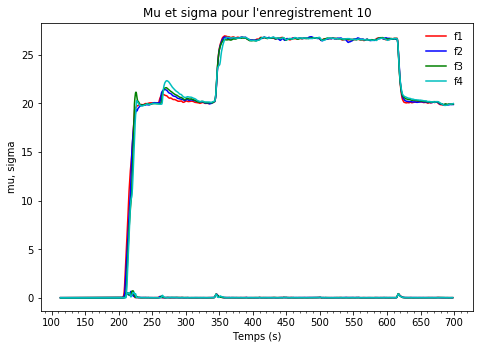

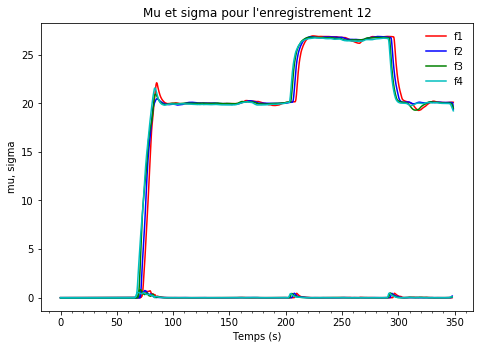

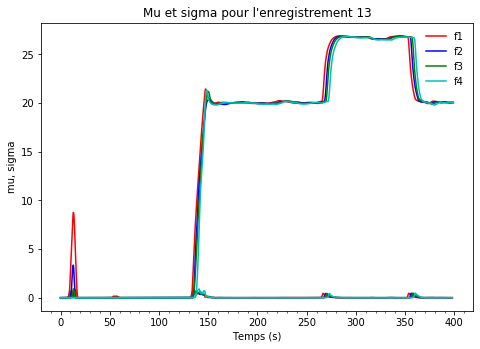

In [139]:
c = ['-k', '-r', '-b', '-g', '-c']
for i in RunNo:
    #print(i)
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    for j in range(1, 5):
        ax.plot(globals()['data{}'.format(i)].Time[:-h], np.array(globals()['mu{}_follower{}'.format(i, j)]), c[j], markersize = 0.5, label = 'f{}'.format(j)) 
        ax.plot(globals()['data{}'.format(i)].Time[:-2*h], np.array(globals()['sigma{}_follower{}'.format(i, j)]), c[j], markersize = 0.5)
        ax.set_xlabel("Temps (s)")
        ax.xaxis.set_major_locator(MultipleLocator(50))
        ax.xaxis.set_minor_locator(MultipleLocator(10))
        ax.set_ylabel("mu, sigma")
        ax.set_title("Mu et sigma pour l'enregistrement " + str(i))
        ax.legend(loc='best', frameon=False)
plt.show()

In [22]:
for i in RunNo:
    for j in range(1, 5):
        globals()['dsigma_tot{}_follower{}'.format(i, j)] = []
        globals()['dsigma_tot{}_follower{}'.format(i, j)] = np.std([globals()['sigma{}_follower{}'.format(i, j)][k] - globals()['sigma{}_follower{}'.format(i, j)][k - 1] for k in range(1, len(globals()['data{}'.format(i)].Time[:-2*h]))])

In [40]:
#remplissage des listes 'changement de vitesse'
i_loc = 0
for i in RunNo:
    print(i)
    for f in range(1, 5):
        globals()['chgt_vitesse{}_follower{}'.format(i, f)] = []
        globals()['ecart_position_leader{}_follower{}'.format(i, f)] = []
        globals()['ecart_position_predec{}_follower{}'.format(i, f)] = []
        inc_prov = -1
        leader = 0
        #on commence à DT et on finit à dt
        for j in range(DT + 1, len(globals()['data{}'.format(i)].Time[:-2*h]) - dt):
            if leader < len(globals()['chgt_vitesse{}_leader'.format(i)]):
                #on compare tout de suite à l'élément de la liste du leader afin de ne pas faire des itérations inutiles et gagner en temsp de calcul
                #on vérifie aussi que l'instant qu'on s'apprête à prendre ne se trouve pas à une distance trop éloignée du leader, sinon on passe au suivant
                if globals()['data{}'.format(i)].Time[j] > globals()['chgt_vitesse{}_leader'.format(i)][leader] and (globals()['data{}'.format(i)].Time[j] < globals()['chgt_vitesse{}_leader'.format(i)][leader] + 20):
                    #on n'a pas besoin d'observer la période de stabilité car celle-ci est déterminée par le changement de vitesse du leader
                    #on cherche le premier instant à partir duquel un changement notable de vitesse se produit
                    #on peut donc utiliser la comparaison du différentiel de sigma à un indicateur
                    #on annule pour le CACC le coefficient 'b_cacc' car les suiveurs ont des profils plus bruités
                    if globals()['sigma{}_follower{}'.format(i, f)][j + 1] - globals()['sigma{}_follower{}'.format(i, f)][j] > 0.5*b*globals()['dsigma_tot{}_follower{}'.format(i, f)]:
                        #on peut garder quand même la condition sur la durée du changement de vitesse afin de ne pas prendre un bruit qui ne serait pas un changement de vitesse
                        inc = 0
                        #print(f, j, globals()['data{}'.format(i)].Time[j], abs(globals()['sigma{}_follower{}'.format(i, f)][j + 1] - globals()['sigma{}_follower{}'.format(i, f)][j]), inc)
                        for k in range(j, j + dt):
                            if abs(globals()['sigma{}_follower{}'.format(i, f)][k + 1] - globals()['sigma{}_follower{}'.format(i, f)][k]) > 0.5*b*globals()['dsigma_tot{}_follower{}'.format(i, f)]:
                                inc += 1
                            #print(f, j, globals()['data{}'.format(i)].Time[j], abs(globals()['sigma{}_follower{}'.format(i, f)][j + 1] - globals()['sigma{}_follower{}'.format(i, f)][j]), inc)
                        #on diminue l'exigence sur la proportion de données pour la même raison qu'on a supprimé le facteur b_cacc
                        if inc >= 0.75*d*dt:
                            if inc_prov == -1:
                                globals()['chgt_vitesse{}_follower{}'.format(i, f)].append(globals()['data{}'.format(i)].Time[j])
                                globals()['ecart_position_leader{}_follower{}'.format(i, f)].append(globals()['data{}'.format(i)]['distToLeader_f{}'.format(f)][j])
                                globals()['ecart_position_predec{}_follower{}'.format(i, f)].append(globals()['data{}'.format(i)]['follower{}_radar1'.format(f)][j])
                                inc_prov += 1
                                #stat_kernel
                                stat_kernel.loc[i_loc] = ['{}_{}'.format(i, f), f, globals()['data{}'.format(i)].Time[j] - globals()['chgt_vitesse{}_leader'.format(i)][leader], globals()['data{}'.format(i)].Time[j], 1]
                                leader += 1
                                i_loc += 1
                            else:
                                if globals()['data{}'.format(i)].Time[j] > globals()['chgt_vitesse{}_follower{}'.format(i, f)][inc_prov] + dt:
                                    globals()['chgt_vitesse{}_follower{}'.format(i, f)].append(globals()['data{}'.format(i)].Time[j])
                                    globals()['ecart_position_leader{}_follower{}'.format(i, f)].append(globals()['data{}'.format(i)]['distToLeader_f{}'.format(f)][j])
                                    globals()['ecart_position_predec{}_follower{}'.format(i, f)].append(globals()['data{}'.format(i)]['follower{}_radar1'.format(f)][j])
                                    inc_prov += 1
                                    #stat_kernel
                                    stat_kernel.loc[i_loc] = ['{}_{}'.format(i, f), f, globals()['data{}'.format(i)].Time[j] - globals()['chgt_vitesse{}_leader'.format(i)][leader], globals()['data{}'.format(i)].Time[j], 1]
                                    leader += 1
                                    i_loc += 1
                elif globals()['data{}'.format(i)].Time[j] > globals()['chgt_vitesse{}_leader'.format(i)][leader] + 20:
                    globals()['chgt_vitesse{}_follower{}'.format(i, f)].append(-1)
                    globals()['ecart_position_leader{}_follower{}'.format(i, f)].append(-1)
                    globals()['ecart_position_predec{}_follower{}'.format(i, f)].append(-1)
                    leader += 1

5
6
9
10
12
13


In [41]:
stat_kernel

,id,veh_position,reaction_time,time,veh_mode
0,5_1,1.0,0.6,185.7,1.0
1,5_1,1.0,0.4,322.4,1.0
2,5_2,2.0,2.8,187.9,1.0
3,5_2,2.0,0.4,322.4,1.0
4,5_3,3.0,4.2,189.3,1.0
...,...,...,...,...,...
58,13_3,3.0,5.4,268.4,1.0
59,13_3,3.0,5.1,356.1,1.0
60,13_4,4.0,5.6,135.5,1.0
61,13_4,4.0,7.7,270.7,1.0


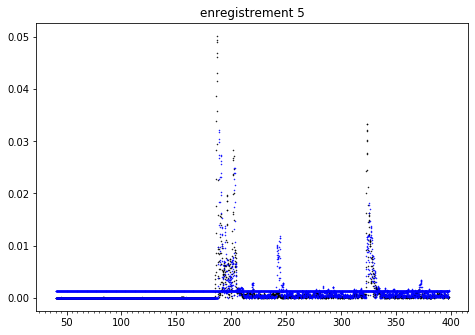

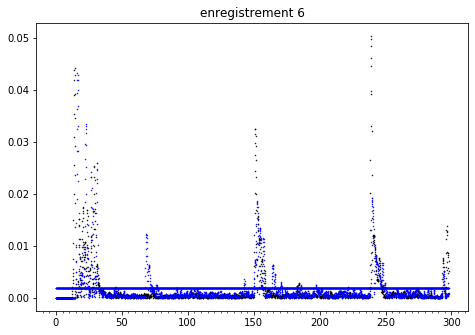

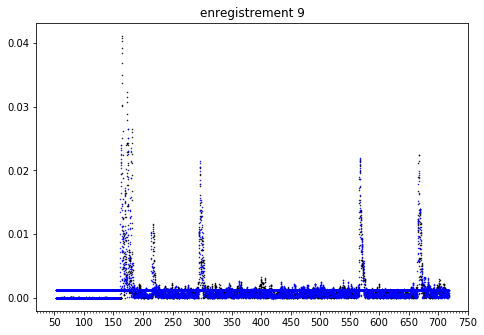

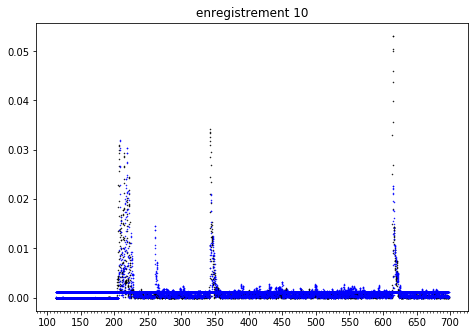

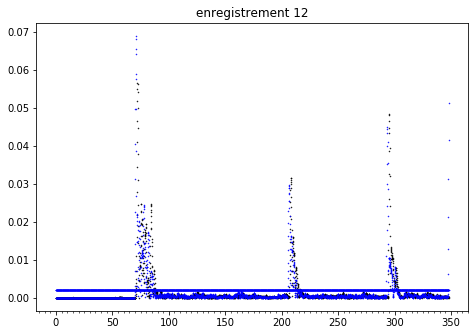

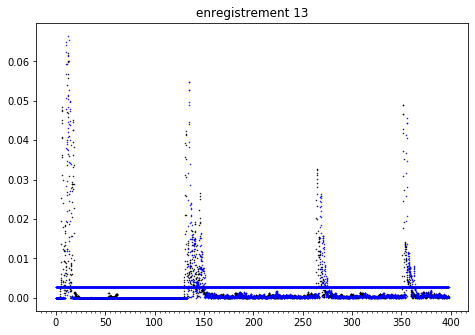

In [337]:
c = ['ok', 'or', 'ob', 'og', 'oc']
c_bis = ['-k', '-r', '-b', '-g', '-c']
for i in RunNo:
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    for f in [2]:
        ax.plot(globals()['data{}'.format(i)].Time[1:-2*h], [abs(globals()['sigma{}_leader'.format(i)][k] - globals()['sigma{}_leader'.format(i)][k - 1]) for k in range(1, len(globals()['data{}'.format(i)].Time[:-2*h]))], 'ok', markersize = 0.5)
        ax.plot(globals()['data{}'.format(i)].Time[1:-2*h], [abs(globals()['sigma{}_follower{}'.format(i, f)][k] - globals()['sigma{}_follower{}'.format(i, f)][k - 1]) for k in range(1, len(globals()['data{}'.format(i)].Time[:-2*h]))], c[f], markersize = 0.5)
        ax.plot(globals()['data{}'.format(i)].Time[:-2*h], [0.5*b*np.std([globals()['sigma{}_follower{}'.format(i, f)][j] - globals()['sigma{}_follower{}'.format(i, f)][j - 1] for j in range(1, len(globals()['data{}'.format(i)].Time[:-2*h]))])]*len(globals()['data{}'.format(i)].Time[:-2*h]), c[f], markersize = 0.5)    

    #for j in range(len(globals()['chgt_vitesse{}_follower{}'.format(i, f)])):
        #ax.plot((globals()['chgt_vitesse{}_follower{}'.format(i, f)][j], globals()['chgt_vitesse{}_follower{}'.format(i, f)][j]), (0, 0.03), c_bis[f])
    #for j in range(len(globals()['chgt_vitesse{}_leader'.format(i)])):
        #ax.plot((globals()['chgt_vitesse{}_leader'.format(i)][j], globals()['chgt_vitesse{}_leader'.format(i)][j]), (0, 0.03), '-k')

    ax.xaxis.set_major_locator(MultipleLocator(50))
    ax.xaxis.set_minor_locator(MultipleLocator(5))
    ax.set_title('enregistrement {}'.format(i))
plt.show()

In [332]:
for i in RunNo:
    print(i, len(globals()['chgt_vitesse{}_leader'.format(i)]), globals()['chgt_vitesse{}_leader'.format(i)])

5 2 [185.1, 322.0]
6 2 [149.9, 237.9]
9 4 [163.2, 293.8, 565.7000000000003, 664.7000000000003]
10 3 [204.7, 341.6, 613.7000000000003]
12 3 [70.7, 206.5, 294.2]
13 3 [129.8, 263.0, 350.8]


In [333]:
for i in RunNo:
    for f in range(1, 5):
        print(i, f, len(globals()['chgt_vitesse{}_follower{}'.format(i, f)]), globals()['chgt_vitesse{}_follower{}'.format(i, f)])

5 1 2 [185.7, 322.4]
5 2 2 [187.9, 322.4]
5 3 2 [189.3, 322.6]
5 4 2 [191.7, 322.5]
6 1 2 [150.0, 238.7]
6 2 2 [150.1, 238.4]
6 3 2 [150.4, 239.1]
6 4 2 [150.0, 238.7]
9 1 4 [163.3, 294.2, 566.1, 665.0]
9 2 4 [163.3, 294.4, 566.0, 665.0]
9 3 4 [164.2, 293.9, 565.8, 664.8]
9 4 4 [164.0, 294.4, 566.0, 664.9]
10 1 3 [205.0, 342.2, 614.2000000000003]
10 2 3 [206.6, 342.2, 614.3]
10 3 3 [208.3, 342.2, 614.1]
10 4 3 [209.8, 342.3, 614.0]
12 1 3 [70.8, 207.5, 295.0]
12 2 3 [70.8, 206.6, -1]
12 3 3 [74.7, -1, -1]
12 4 3 [72.5, -1, -1]
13 1 3 [131.2, 264.5, 351.9]
13 2 3 [133.4, 266.9, 354.4]
13 3 3 [133.0, 268.4, 356.1]
13 4 3 [135.5, 270.7, 358.4]


In [3]:
218/227

0.960352422907489

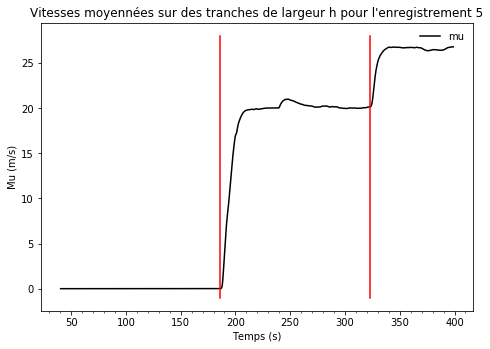

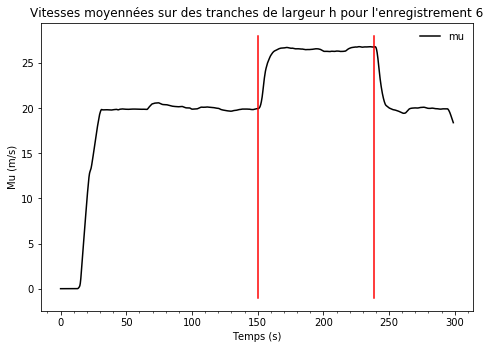

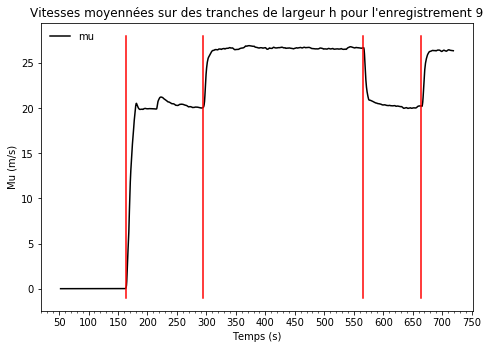

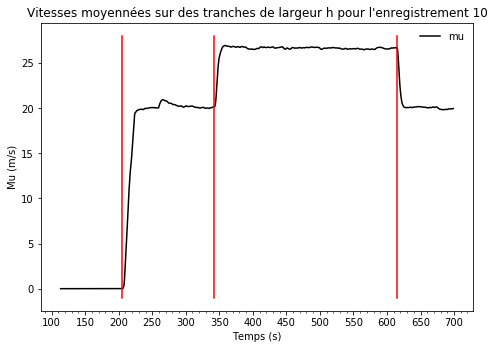

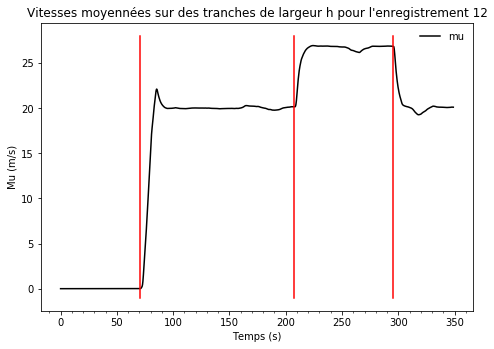

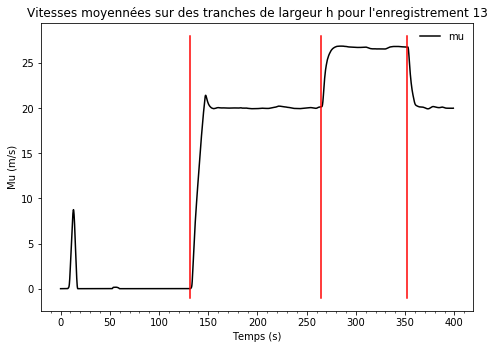

In [335]:
#choix du follower
f = 1
#vérification des instants détectés pour les suiveurs : 1 par 1
#représentation des instants des changements de vitesse sur le profil de vitesse des enregistrements en CACC
#première manière de contrôler l'agorithme
for i in RunNo:
    #print(i)
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.plot(globals()['data{}'.format(i)].Time[:-h], np.array(globals()['mu{}_follower{}'.format(i, f)]), '-k', markersize = 0.3, label = 'mu') 
    for j in range(len(globals()['chgt_vitesse{}_follower{}'.format(i, f)])):
        ax.plot((globals()['chgt_vitesse{}_follower{}'.format(i, f)][j], globals()['chgt_vitesse{}_follower{}'.format(i, f)][j]), (-1, 28), '-r', markersize = 0.3)
    
    ax.set_xlabel("Temps (s)")
    ax.xaxis.set_major_locator(MultipleLocator(50))
    ax.xaxis.set_minor_locator(MultipleLocator(10))
    ax.set_ylabel("Mu (m/s)")
    ax.set_title("Vitesses moyennées sur des tranches de largeur h pour l'enregistrement " + str(i))
    ax.legend(loc='best', frameon=False)
plt.show()

L'enregistrement 12 ne sera pas retenu car les follower semblent recevoir l'information avant même que le leader change de vitesse, ce qui n'est pas cohérent avec la définition du système.

# Enregistrement des temps de réponse

In [338]:
import pickle

In [342]:
for i in RunNo:
    with open("chgt_vitesse{}_leader.txt".format(i), "wb") as fp:
        pickle.dump(globals()['chgt_vitesse{}_leader'.format(i)], fp)
    for f in range(1, 5):
        with open("chgt_vitesse{}_follower{}.txt".format(i, f), "wb") as fp:
            pickle.dump(globals()['chgt_vitesse{}_follower{}'.format(i, f)], fp)

In [343]:
for i in RunNo:
    with open("chgt_vitesse{}_leader.txt".format(i, f), "rb") as fp:
        globals()['chgt_vitesse{}_leader'.format(i, f)] = pickle.load(fp)
    for f in range(1, 5):
        with open("chgt_vitesse{}_follower{}.txt".format(i, f), "rb") as fp:
            globals()['chgt_vitesse{}_follower{}'.format(i, f)] = pickle.load(fp)

## Profils et temps de réponse

In [19]:
#création du df pour les enregistrements CACC, c'est le plus simple
df_vitesse_leader_CARMA = pd.DataFrame()
#colonne des abscisses
df_vitesse_leader_CARMA['follower'] = np.arange(1, 5)
inc = 0
for i in RunNo:
    print(i)
    #on supprime l'enregistrement 12 qui ne marche pas
    if i != 12:
        for k in range(len(globals()['vitesse{}_leader'.format(i)])):
            inc += 1
            df_vitesse_leader_CARMA['chgt{}'.format(inc)] = [-1.00]*4

5
6
9
10
12
13


In [20]:
inc = 0
for i in RunNo:
    print(i)
    if i != 12:
        for k in range(len(globals()['vitesse{}_leader'.format(i)])):
            inc += 1
            for f in range(1, 5):
                #print(globals()['chgt_vitesse{}_follower{}'.format(i, f)][k] - globals()['chgt_vitesse{}_leader'.format(i)][k])
                df_vitesse_leader_CARMA['chgt{}'.format(inc)][f - 1] = (globals()['vitesse{}_leader'.format(i)][k])
    

5
6
9
10
12
13


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [21]:
df_vitesse_leader_CARMA

,follower,chgt1,chgt2,chgt3,chgt4,chgt5,chgt6,chgt7,chgt8,chgt9,chgt10,chgt11,chgt12,chgt13,chgt14
0,1,0.001,20.079,19.974,26.803,0.001,20.056,26.64,20.247,0.0,20.155,26.675,0.0,20.08,26.702
1,2,0.001,20.079,19.974,26.803,0.001,20.056,26.64,20.247,0.0,20.155,26.675,0.0,20.08,26.702
2,3,0.001,20.079,19.974,26.803,0.001,20.056,26.64,20.247,0.0,20.155,26.675,0.0,20.08,26.702
3,4,0.001,20.079,19.974,26.803,0.001,20.056,26.64,20.247,0.0,20.155,26.675,0.0,20.08,26.702


In [348]:
#création du df pour les enregistrements CACC, c'est le plus simple
df_tps_reponse_leader_CARMA = pd.DataFrame()
#colonne des abscisses
df_tps_reponse_leader_CARMA['follower'] = np.arange(1, 5)
inc = 0
for i in RunNo:
    print(i)
    #on supprime l'enregistrement 12 qui ne marche pas
    if i != 12:
        for k in range(len(globals()['chgt_vitesse{}_leader'.format(i)])):
            inc += 1
            df_tps_reponse_leader_CARMA['chgt{}'.format(inc)] = [-1.00]*4

5
6
9
10
12
13


In [349]:
inc = 0
for i in RunNo:
    print(i)
    if i != 12:
        for k in range(len(globals()['chgt_vitesse{}_leader'.format(i)])):
            inc += 1
            for f in range(1, 5):
                #print(globals()['chgt_vitesse{}_follower{}'.format(i, f)][k] - globals()['chgt_vitesse{}_leader'.format(i)][k])
                df_tps_reponse_leader_CARMA['chgt{}'.format(inc)][f - 1] = (globals()['chgt_vitesse{}_follower{}'.format(i, f)][k] - globals()['chgt_vitesse{}_leader'.format(i)][k])
    

5
6
9
10
12
13


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [350]:
df_tps_reponse_leader_CARMA

,follower,chgt1,chgt2,chgt3,chgt4,chgt5,chgt6,chgt7,chgt8,chgt9,chgt10,chgt11,chgt12,chgt13,chgt14
0,1,0.6,0.4,0.1,0.8,0.1,0.4,0.4,0.3,0.3,0.6,0.5,1.4,1.5,1.1
1,2,2.8,0.4,0.2,0.5,0.1,0.6,0.3,0.3,1.9,0.6,0.6,3.6,3.9,3.6
2,3,4.2,0.6,0.5,1.2,1.0,0.1,0.1,0.1,3.6,0.6,0.4,3.2,5.4,5.3
3,4,6.6,0.5,0.1,0.8,0.8,0.6,0.3,0.2,5.1,0.7,0.3,5.7,7.7,7.6


In [30]:
#création du df pour les enregistrements CACC, c'est le plus simple
df_ecart_position_leader_CARMA = pd.DataFrame()
#colonne des abscisses
df_ecart_position_leader_CARMA['follower'] = np.arange(1, 5)
inc = 0
for i in RunNo:
    print(i)
    #on supprime l'enregistrement 12 qui ne marche pas
    if i != 12:
        for k in range(len(globals()['ecart_position_leader{}_follower{}'.format(i, f)])):
            inc += 1
            df_ecart_position_leader_CARMA['chgt{}'.format(inc)] = [-1.00]*4

5
6
9
10
12
13


In [31]:
inc = 0
for i in RunNo:
    print(i)
    if i != 12:
        for k in range(len(globals()['ecart_position_leader{}_follower1'.format(i)])):
            inc += 1
            for f in range(1, 5):
                #print(globals()['chgt_vitesse{}_follower{}'.format(i, f)][k] - globals()['chgt_vitesse{}_leader'.format(i)][k])
                df_ecart_position_leader_CARMA['chgt{}'.format(inc)][f - 1] = (globals()['ecart_position_leader{}_follower{}'.format(i, f)][k])
    

5
6
9
10
12
13


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [32]:
df_ecart_position_leader_CARMA

,follower,chgt1,chgt2,chgt3,chgt4,chgt5,chgt6,chgt7,chgt8,chgt9,chgt10,chgt11,chgt12,chgt13,chgt14
0,1,5.500,20.25,12.375,20.500,4.375,21.125,28.500,21.500,5.000,13.375,20.375,7.750,21.625,24.500
1,2,10.750,41.75,26.750,37.875,12.500,41.750,56.875,41.000,9.000,26.500,37.250,16.750,68.750,84.750
2,3,16.750,63.00,64.125,80.250,14.000,41.750,56.875,41.000,12.625,39.500,55.250,33.625,102.250,118.125
3,4,37.875,85.00,86.500,108.500,24.250,63.875,88.000,62.375,24.625,53.250,73.750,49.625,149.500,162.000


In [38]:
#création du df pour les enregistrements CACC, c'est le plus simple
df_ecart_position_predec_CARMA = pd.DataFrame()
#colonne des abscisses
df_ecart_position_predec_CARMA['follower'] = np.arange(1, 5)
inc = 0
for i in RunNo:
    print(i)
    #on supprime l'enregistrement 12 qui ne marche pas
    if i != 12:
        for k in range(len(globals()['ecart_position_predec{}_follower{}'.format(i, f)])):
            inc += 1
            df_ecart_position_predec_CARMA['chgt{}'.format(inc)] = [-1.00]*4

5
6
9
10
12
13


In [39]:
inc = 0
for i in RunNo:
    print(i)
    if i != 12:
        for k in range(len(globals()['ecart_position_predec{}_follower1'.format(i)])):
            inc += 1
            for f in range(1, 5):
                #print(globals()['chgt_vitesse{}_follower{}'.format(i, f)][k] - globals()['chgt_vitesse{}_leader'.format(i)][k])
                df_ecart_position_predec_CARMA['chgt{}'.format(inc)][f - 1] = (globals()['ecart_position_predec{}_follower{}'.format(i, f)][k])

5
6
9
10
12
13


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


No handles with labels found to put in legend.


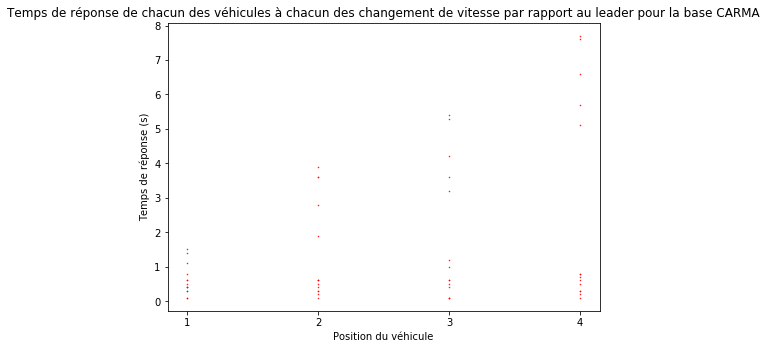

In [351]:
#tracé des temps de réponse par rapport au leader pour chacun des véhicules pour les enregistrements CACC
#choix du follower
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])   
for j in range(len(df_tps_reponse_leader_CARMA.columns) - 1):
    ax.plot(df_tps_reponse_leader_CARMA.follower, df_tps_reponse_leader_CARMA['chgt{}'.format(j + 1)], 'or', markersize = 0.5) 
ax.set_xlabel("Position du véhicule")
ax.xaxis.set_major_locator(MultipleLocator(1))
#ax.xaxis.set_minor_locator(MultipleLocator(10))
ax.set_ylabel("Temps de réponse (s)")
ax.set_title("Temps de réponse de chacun des véhicules à chacun des changement de vitesse par rapport au leader pour la base CARMA")
ax.legend(loc='best', frameon=False)
plt.show()

On voit déjà assez nettement pour cette base les points qui semblent fonctionner avec le mode CACC et les points pour lesquels le CACC ne marche pas.

In [354]:
#deuxième df mais cette fois-ci par rapport au prédécesseur
df_tps_reponse_predec_CARMA = pd.DataFrame()
#colonne des abscisses
df_tps_reponse_predec_CARMA['follower'] = np.arange(1, 5)
inc = 0
for i in RunNo:
    if i != 12:
        print(i)
        for k in range(len(globals()['chgt_vitesse{}_leader'.format(i)])):
            inc += 1
            df_tps_reponse_predec_CARMA['chgt{}'.format(inc)] = [-1.00]*4

5
6
9
10
13


In [356]:
inc = 0
for i in RunNo:
    if i != 12:
        print(i)
        for k in range(len(globals()['chgt_vitesse{}_leader'.format(i)])):
            inc += 1
            #on doit cette fois raisonner par rapport au prédécesseur
            #on distingue le cas du leader avec son premier suiveur
            df_tps_reponse_predec_CARMA['chgt{}'.format(inc)][0] = (globals()['chgt_vitesse{}_follower1'.format(i)][k] - globals()['chgt_vitesse{}_leader'.format(i)][k])
            for f in range(2, 5):
                #print(globals()['chgt_vitesse{}_follower{}'.format(i, f)][k] - globals()['chgt_vitesse{}_leader'.format(i)][k])
                df_tps_reponse_predec_CARMA['chgt{}'.format(inc)][f - 1] = (globals()['chgt_vitesse{}_follower{}'.format(i, f)][k] - globals()['chgt_vitesse{}_follower{}'.format(i, f - 1)][k])
    

5
6
9
10
13


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [357]:
df_tps_reponse_predec_CARMA

,follower,chgt1,chgt2,chgt3,chgt4,chgt5,chgt6,chgt7,chgt8,chgt9,chgt10,chgt11,chgt12,chgt13,chgt14
0,1,0.6,0.4,0.1,0.8,0.1,0.4,0.4,0.3,0.3,0.6,0.5,1.4,1.5,1.1
1,2,2.2,0.0,0.1,-0.3,0.0,0.2,-0.1,0.0,1.6,0.0,0.1,2.2,2.4,2.5
2,3,1.4,0.2,0.3,0.7,0.9,-0.5,-0.2,-0.2,1.7,0.0,-0.2,-0.4,1.5,1.7
3,4,2.4,-0.1,-0.4,-0.4,-0.2,0.5,0.2,0.1,1.5,0.1,-0.1,2.5,2.3,2.3


No handles with labels found to put in legend.


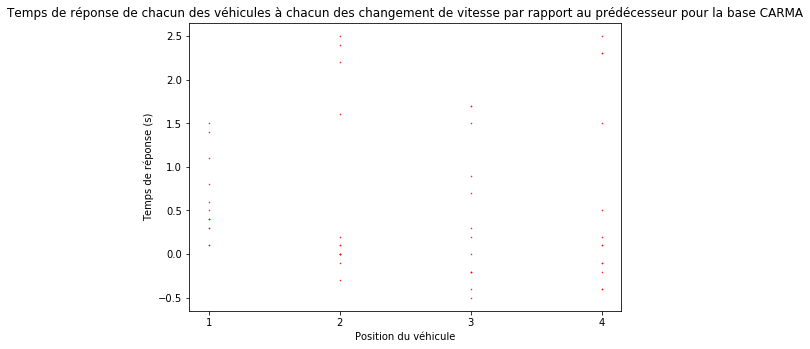

In [359]:
#tracé des temps de réponse par rapport au leader pour chacun des véhicules pour les enregistrements CACC
#choix du follower
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
#on ne plot pas le temps de réponse du premier suiveur par rapport au leader, le but étant de voir les différences entre les suiveurs
for j in range(1, len(df_tps_reponse_predec_CARMA.columns) - 1):
    ax.plot(df_tps_reponse_predec_CARMA.follower, df_tps_reponse_predec_CARMA['chgt{}'.format(j + 1)], 'or', markersize = 0.5) 
ax.set_xlabel("Position du véhicule")
ax.xaxis.set_major_locator(MultipleLocator(1))
#ax.xaxis.set_minor_locator(MultipleLocator(10))
ax.set_ylabel("Temps de réponse (s)")
ax.set_title("Temps de réponse de chacun des véhicules à chacun des changement de vitesse par rapport au prédécesseur pour la base CARMA")
ax.legend(loc='best', frameon=False)
plt.show()

On peut maintenant tracer la distribution des temps de réponse par rapport au leader.

In [398]:
#on peut déjà tracer la distribution des temps de réponse par rapport au prédécesseur
df_distribution = pd.DataFrame()
df_distribution['CARMA'] = [-1.00]*(len(df_tps_reponse_predec_CARMA.columns) - 2)*(len(df_tps_reponse_predec_CARMA.follower) - 1)
inc = 0
for j in range(2, len(df_tps_reponse_predec_CARMA.columns)):
    for f in range(1, len(df_tps_reponse_predec_CARMA.follower)):
        df_distribution['CARMA'][inc] = df_tps_reponse_predec_CARMA['chgt{}'.format(j)][f]
        inc += 1

In [399]:
#on supprime les valeurs non sens
liste_drop = []
for j in range(len(df_distribution.CARMA)):
    if df_distribution.CARMA[j] == -1.00:
        liste_drop.append(j)

In [400]:
df_distribution.drop(liste_drop, 0, inplace = True)

In [403]:
df_distribution = df_distribution.reset_index(drop = True)

In [365]:
import seaborn as sns

Text(0.5, 1.0, 'Distribution des temps de réponse par rapport au leader')

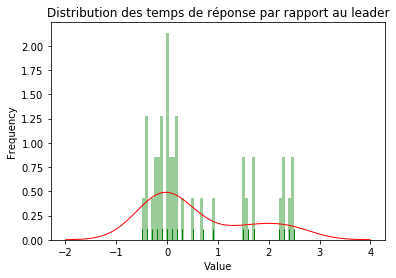

In [366]:
sns.distplot(df_distribution, 50, color = 'green', rug = True, kde_kws = {'color': 'red', 'lw': 1})
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution des temps de réponse par rapport au leader')

# Enregsitrement du df en .csv

In [393]:
df_tps_reponse_leader_CARMA.to_csv('df_tps_reponse_leader_CARMA.csv', index = False)
df_tps_reponse_predec_CARMA.to_csv('df_tps_reponse_predec_CARMA.csv', index = False)

In [22]:
df_vitesse_leader_CARMA.to_csv('df_vitesse_leader_CARMA.csv', index = False)

In [40]:
df_ecart_position_leader_CARMA.to_csv('df_ecart_position_leader_CARMA.csv', index = False)
df_ecart_position_predec_CARMA.to_csv('df_ecart_position_predec_CARMA.csv', index = False)

In [42]:
stat_kernel.to_csv('stat_kernel_CARMA.csv', index = False)